***Lekshmi S. Sunil***

# Loading packages & Reading datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
# ignore warnings
import warnings
warnings.simplefilter("ignore") 

os.listdir('../input/acea-water-prediction')

['Aquifer_Doganella.csv',
 'Aquifer_Auser.csv',
 'Water_Spring_Amiata.csv',
 'datasets_description.ods',
 'Lake_Bilancino.csv',
 'datasets_description.xlsx',
 'Water_Spring_Madonna_di_Canneto.csv',
 'Aquifer_Luco.csv',
 'Aquifer_Petrignano.csv',
 'Water_Spring_Lupa.csv',
 'River_Arno.csv']

In [2]:
Aquifer_Auser = pd.read_csv('../input/acea-water-prediction/Aquifer_Auser.csv', index_col = 'Date')
Aquifer_Petrignano = pd.read_csv('../input/acea-water-prediction/Aquifer_Petrignano.csv', index_col = 'Date')
Aquifer_Doganella = pd.read_csv('../input/acea-water-prediction/Aquifer_Doganella.csv', index_col = 'Date')
Aquifer_Luco = pd.read_csv('../input/acea-water-prediction/Aquifer_Luco.csv', index_col = 'Date')
Water_Spring_Amiata = pd.read_csv('../input/acea-water-prediction/Water_Spring_Amiata.csv', index_col = 'Date')
Water_Spring_Madonna_di_Canneto = pd.read_csv('../input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv', index_col = 'Date')
Water_Spring_Lupa = pd.read_csv('../input/acea-water-prediction/Water_Spring_Lupa.csv', index_col = 'Date')
River_Arno = pd.read_csv('../input/acea-water-prediction/River_Arno.csv', index_col = 'Date')
Lake_Bilancino = pd.read_csv('../input/acea-water-prediction/Lake_Bilancino.csv', index_col = 'Date')


datasets = [Aquifer_Auser,Aquifer_Petrignano,Aquifer_Doganella,Aquifer_Luco,Water_Spring_Amiata,
             Water_Spring_Madonna_di_Canneto,Water_Spring_Lupa, River_Arno,Lake_Bilancino,]

datasets_names = ['Aquifer_Auser','Aquifer_Petrignano','Aquifer_Doganella','Aquifer_Luco', 'Water_Spring_Amiata','Water_Spring_Madonna_di_Canneto', 
               'Water_Spring_Lupa', 'River_Arno', 'Lake_Bilancino']

# EDA

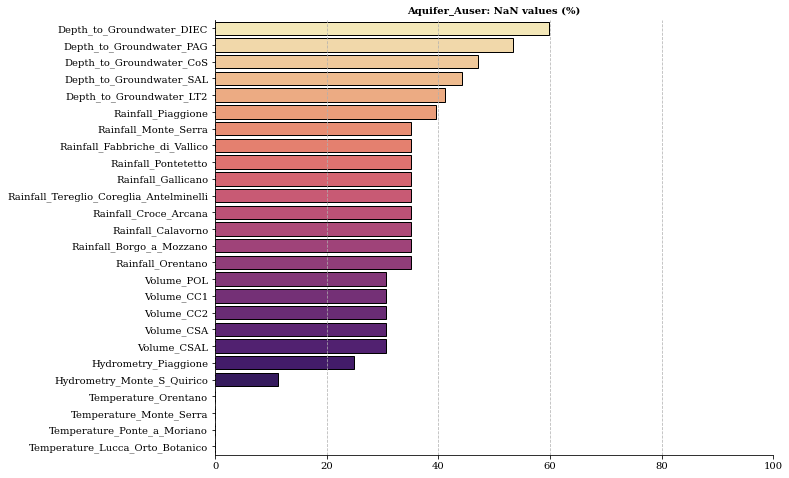

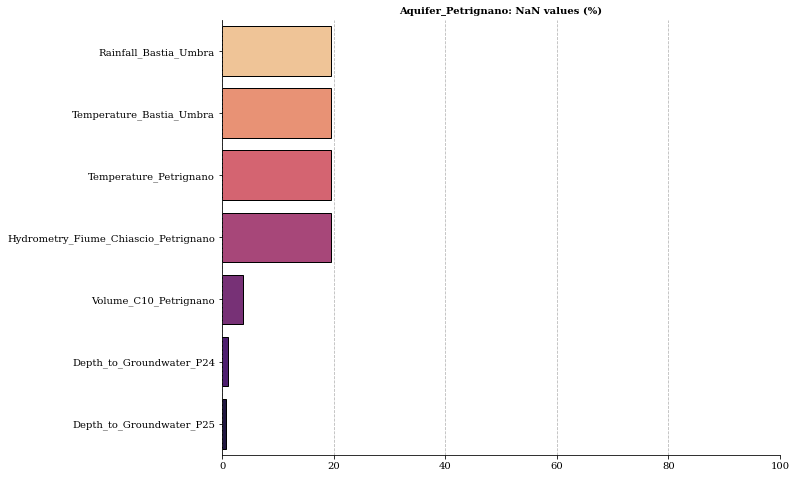

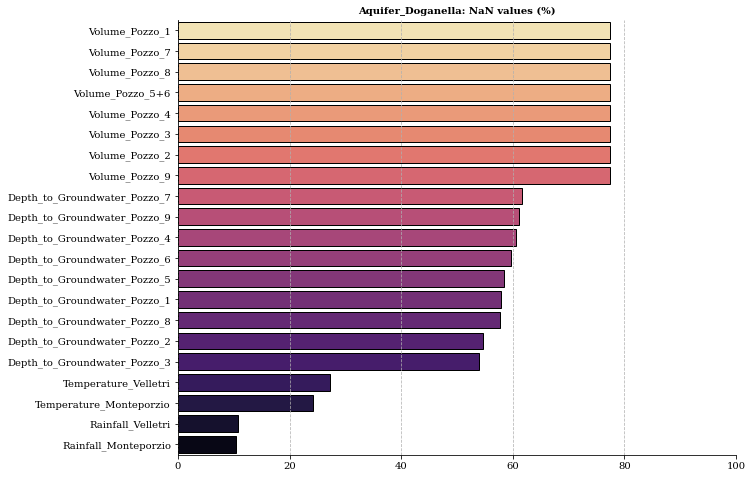

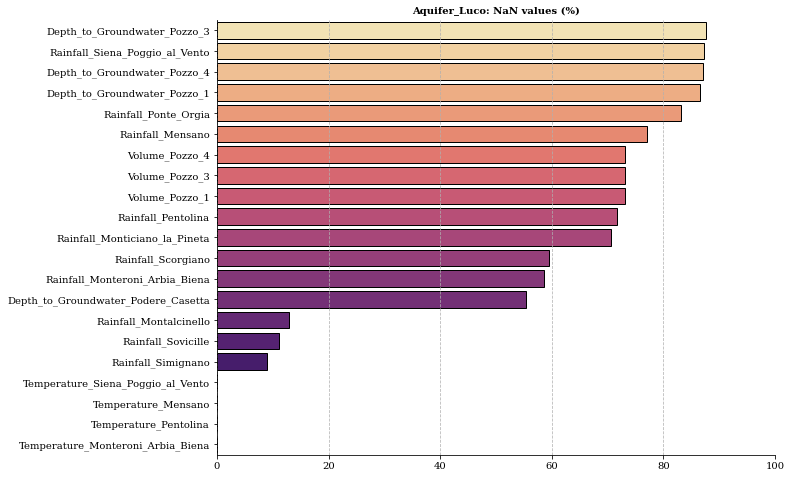

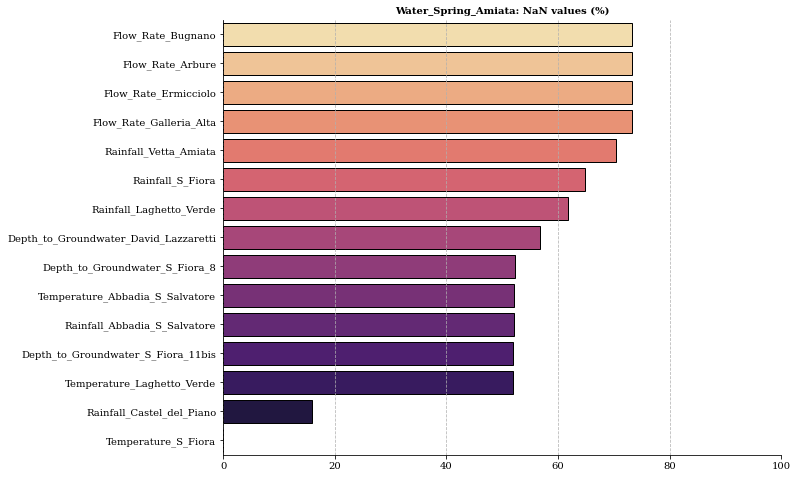

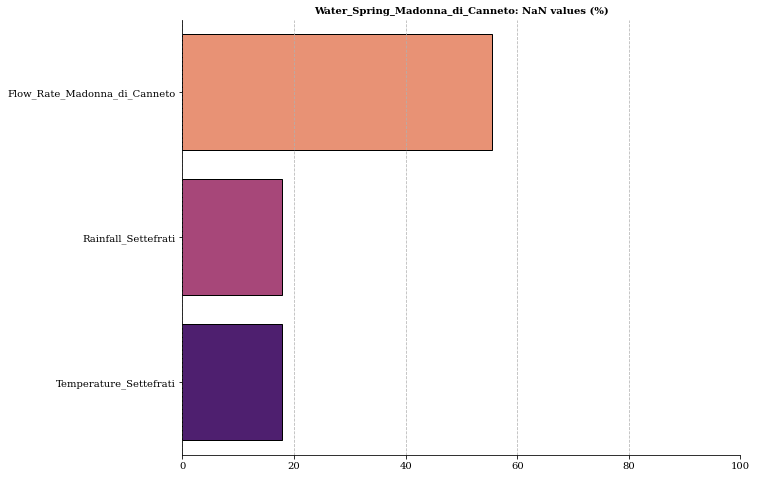

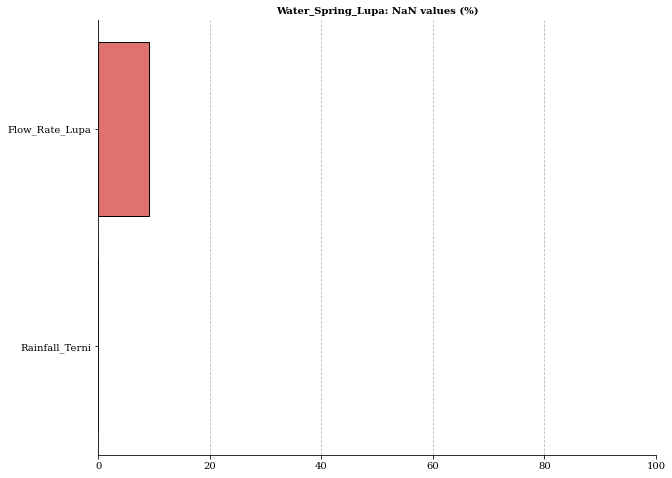

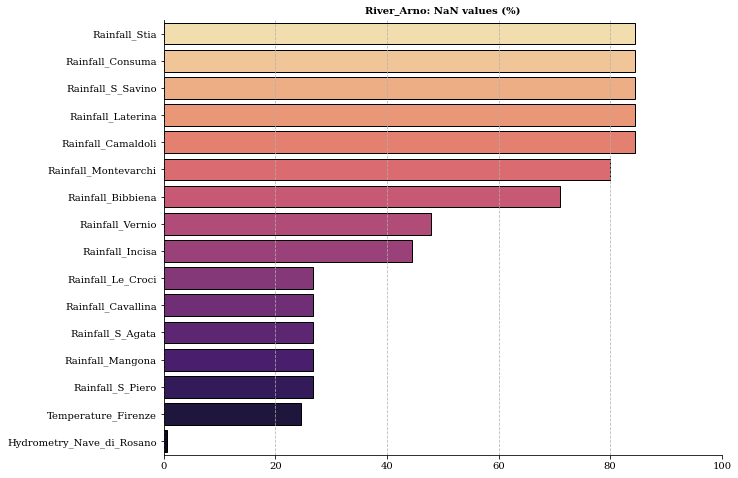

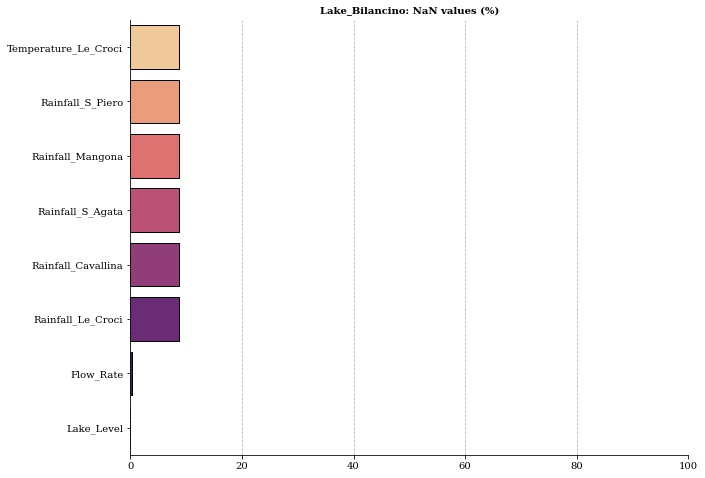

In [3]:
def bar_plot(x, y, title, palette_len, xlim = None, ylim = None, 
             xticklabels = None, yticklabels = None, 
             top_visible = False, right_visible = False, 
             bottom_visible = True, left_visible = False,
             xlabel = None, ylabel = None, figsize = (10, 4),
             axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title, size = 10, fontweight = 'bold', fontfamily = 'serif')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(top_visible)
    ax.spines['right'].set_visible(right_visible)
    ax.spines['bottom'].set_visible(bottom_visible)
    ax.spines['left'].set_visible(left_visible)

    sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
                palette = reversed(sns.color_palette("magma", len(palette_len))))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)    
    ax.set_xticklabels(xticklabels, fontfamily = 'serif')
    ax.set_yticklabels(yticklabels, fontfamily = 'serif')
    plt.xlabel(xlabel, fontfamily = 'serif')
    plt.ylabel(ylabel, fontfamily = 'serif')
    ax.grid(axis = axis_grid, linestyle = '--', alpha = 0.9)
    plt.show()
    
for i in range(len(datasets)):
    NaN_values = (datasets[i].isnull().sum() / len(datasets[i]) * 100).sort_values(ascending = False)
    bar_plot(x = NaN_values, y = NaN_values.index, title = '{}: NaN values (%)'.format(datasets_names[i]), palette_len = NaN_values.index, xlim = (0, 100), 
             xticklabels = range(0, 101, 20), yticklabels = NaN_values.index, left_visible = True, figsize = (10, 8), axis_grid = 'x')

In [4]:
def corr_plot(data, top_visible = False, right_visible = False, bottom_visible = True, left_visible = False, ylabel = None, figsize = (15, 11), axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title('Pearson Correlations', size = 15, fontweight = 'bold', fontfamily = 'serif')
    
    mask = np.triu(np.ones_like(data.corr(), dtype = bool))
    sns.heatmap(round(data.corr(), 2), mask = mask, cmap = 'magma', annot = True)
    plt.show()

# 1. Aquifer Auser

In [5]:
print('The earliest date: \t%s' %datasets[0].index.values[[0, -1]][0])
print('The latest date: \t%s' %datasets[0].index.values[[0, -1]][1])

The earliest date: 	05/03/1998
The latest date: 	30/06/2020


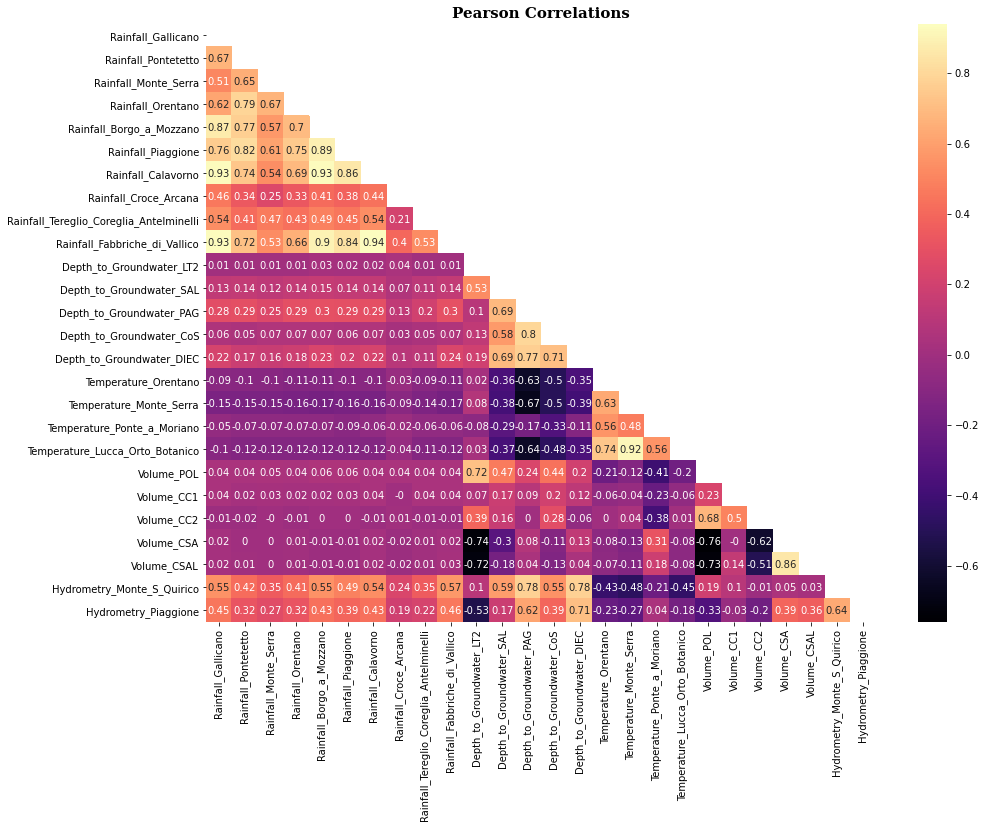

In [6]:
corr_plot(datasets[0])

In [7]:
df = Aquifer_Auser.reset_index()
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month

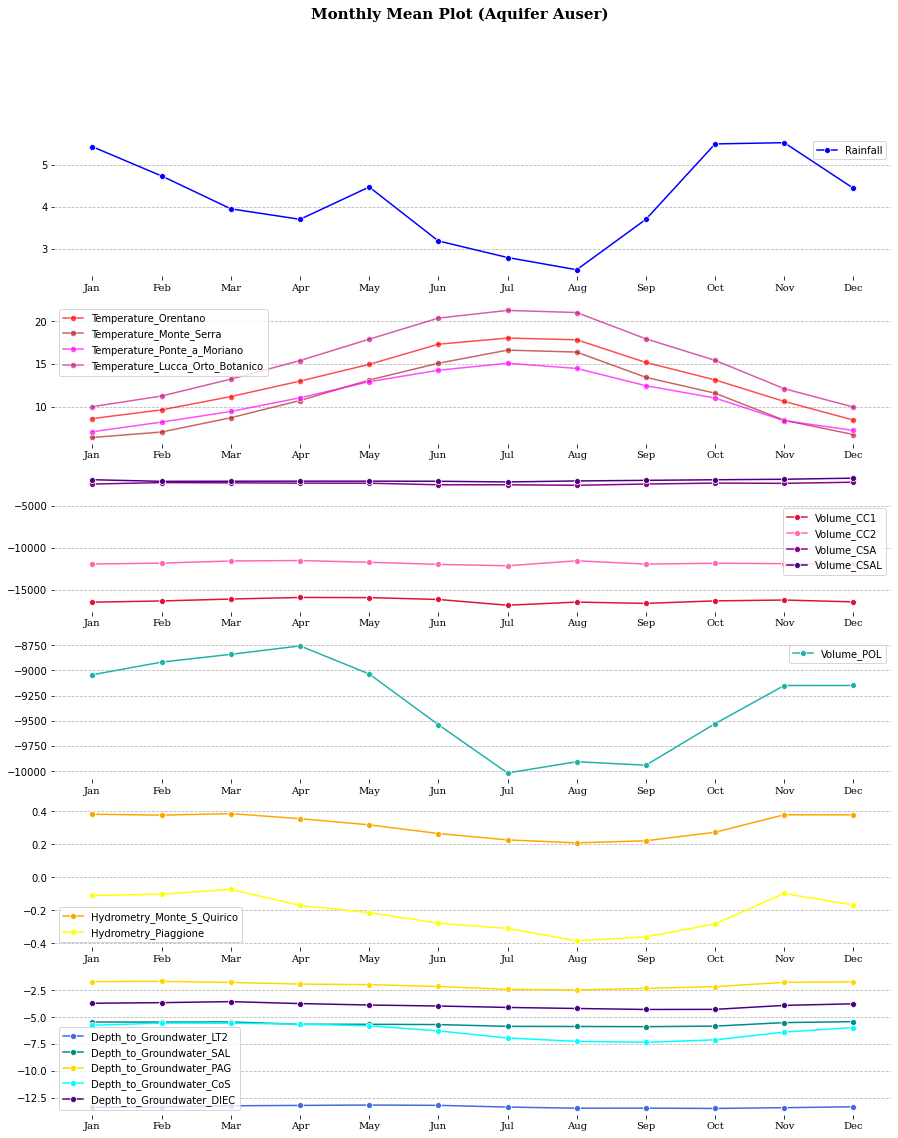

In [8]:
#monthly mean plot
aa_means = df.groupby('month').mean().reset_index()
rainfall_col = [col for col in aa_means.columns if 'Rainfall' in col]
temperature_col = [col for col in aa_means.columns if 'Temperature' in col]
volume_col = [col for col in aa_means.columns if 'Volume' in col]
hydrometry_col = [col for col in aa_means.columns if 'Hydrometry' in col]
groundwater_col = [col for col in aa_means.columns if 'Depth_to_Groundwater' in col]
aa_means['rainfall'] = aa_means[rainfall_col].mean(axis = 1)

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize = (15, 18))
plt.suptitle('Monthly Mean Plot (Aquifer Auser)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = aa_means, x = 'month', y = 'rainfall', marker='o', color = 'blue', label = 'Rainfall', alpha = 1, ax = ax1)

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(aa_means.month[::1])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['red', 'firebrick', 'fuchsia', 'mediumvioletred']
n = 0
for i in temperature_col:
    sns.lineplot(data = aa_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 0.7, ax = ax2)
    n +=1

for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(aa_means.month[::1])
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['crimson', 'hotpink', 'darkmagenta', 'indigo']
n = 0
for i in volume_col[1:]:
    sns.lineplot(data = aa_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax3)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(aa_means.month[::1])
ax3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = aa_means, x = 'month', y = volume_col[0], marker = 'o', color = 'lightseagreen', label = volume_col[0], alpha = 1, ax = ax4)

for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(aa_means.month[::1])
ax4.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['orange', 'yellow']
n = 0
for i in hydrometry_col:
    sns.lineplot(data = aa_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax5)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax5.spines[i].set_visible(False)

ax5.set_xticks(aa_means.month[::1])
ax5.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['royalblue', 'darkcyan', 'gold', 'aqua', 'indigo']
n = 0
for i in groundwater_col:
    sns.lineplot(data = aa_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax6)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax6.spines[i].set_visible(False)

ax6.set_xticks(aa_means.month[::1])
ax6.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.grid(axis = 'y', linestyle = '--', alpha = 0.9)

plt.show()

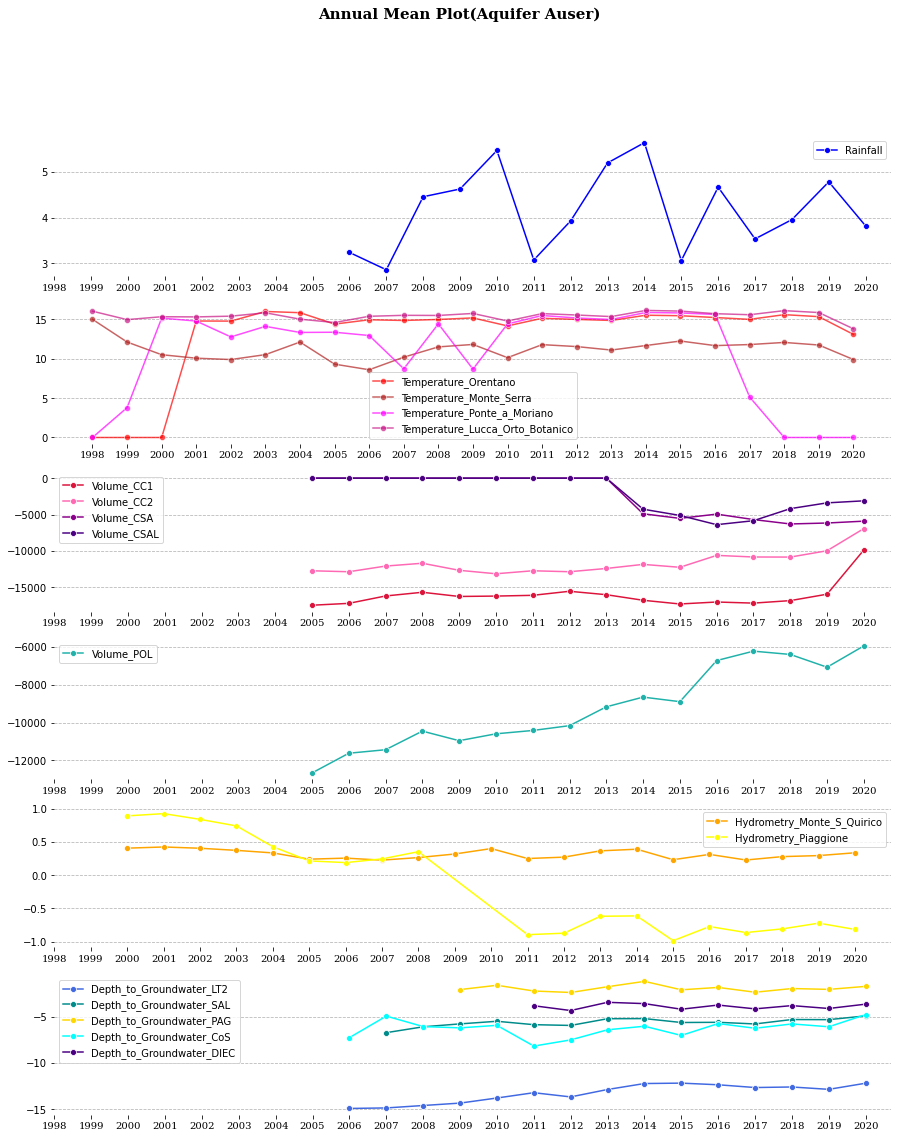

In [9]:
# annual mean plot
aa_means_y = df.groupby('year').mean().reset_index()
aa_means_y['rainfall'] = aa_means_y[rainfall_col].mean(axis = 1)

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize = (15, 18))
plt.suptitle('Annual Mean Plot(Aquifer Auser)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = aa_means_y, x = 'year', y = 'rainfall', marker = 'o', color = 'blue', label = 'Rainfall', alpha = 1, ax = ax1)

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(aa_means_y.year[::1])
ax1.set_xticklabels(range(1998, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['red', 'firebrick', 'fuchsia', 'mediumvioletred']
n = 0
for i in temperature_col:
    sns.lineplot(data = aa_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 0.7, ax = ax2)
    n +=1

for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(aa_means_y.year[::1])
ax2.set_xticklabels(range(1998, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['crimson', 'hotpink', 'darkmagenta', 'indigo']
n = 0
for i in volume_col[1:]:
    sns.lineplot(data = aa_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax3)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(aa_means_y.year[::1])
ax3.set_xticklabels(range(1998, 2021, 1), fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = aa_means_y, x = 'year', y = volume_col[0], marker = 'o', color = 'lightseagreen', label = volume_col[0], alpha = 1, ax = ax4)

for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(aa_means_y.year[::1])
ax4.set_xticklabels(range(1998, 2021, 1), fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['orange', 'yellow']
n = 0
for i in hydrometry_col:
    sns.lineplot(data = aa_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax5)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax5.spines[i].set_visible(False)

ax5.set_xticks(aa_means_y.year[::1])
ax5.set_xticklabels(range(1998, 2021, 1), fontfamily = 'serif')
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['royalblue', 'darkcyan', 'gold', 'aqua', 'indigo']
n = 0
for i in groundwater_col:
    sns.lineplot(data = aa_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax6)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax6.spines[i].set_visible(False)

ax6.set_xticks(aa_means_y.year[::1])
ax6.set_xticklabels(range(1998, 2021, 1), fontfamily = 'serif')
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.grid(axis = 'y', linestyle = '--', alpha = 0.9)

plt.show()

# 2. Aquifer Petrignano

In [10]:
print('The earliest date: \t%s' %datasets[1].index.values[[0, -1]][0])
print('The latest date: \t%s' %datasets[1].index.values[[0, -1]][1])

The earliest date: 	14/03/2006
The latest date: 	30/06/2020


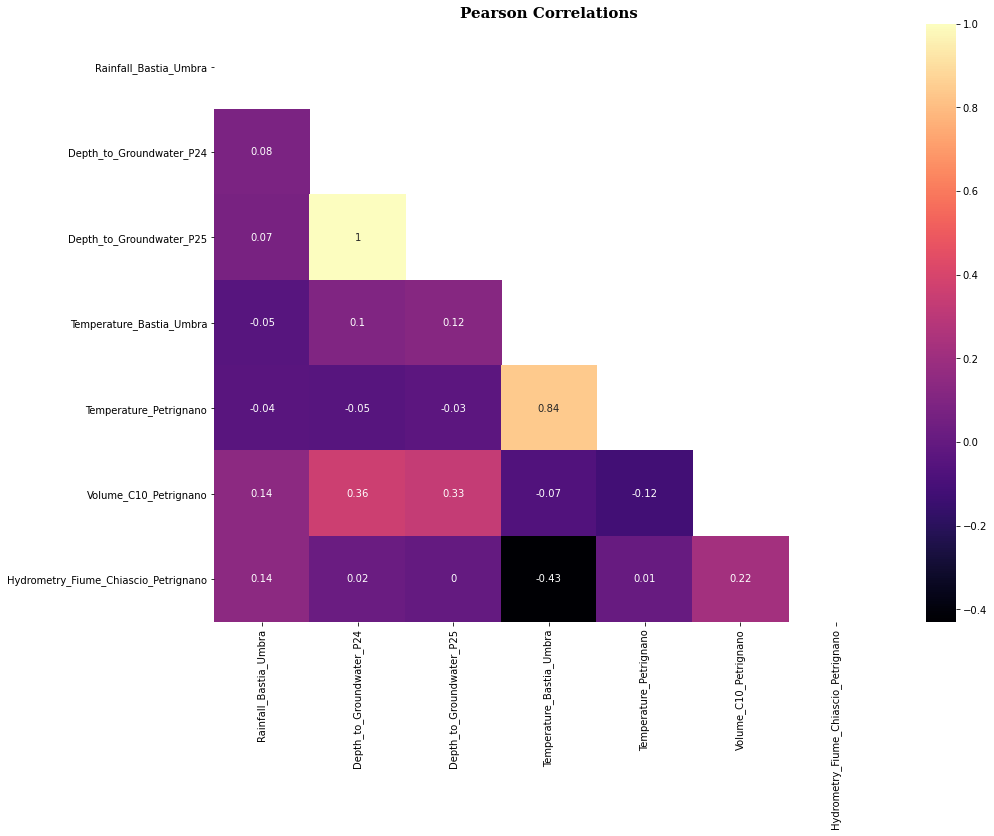

In [11]:
corr_plot(datasets[1])

In [12]:
df = Aquifer_Petrignano.reset_index().copy()
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month

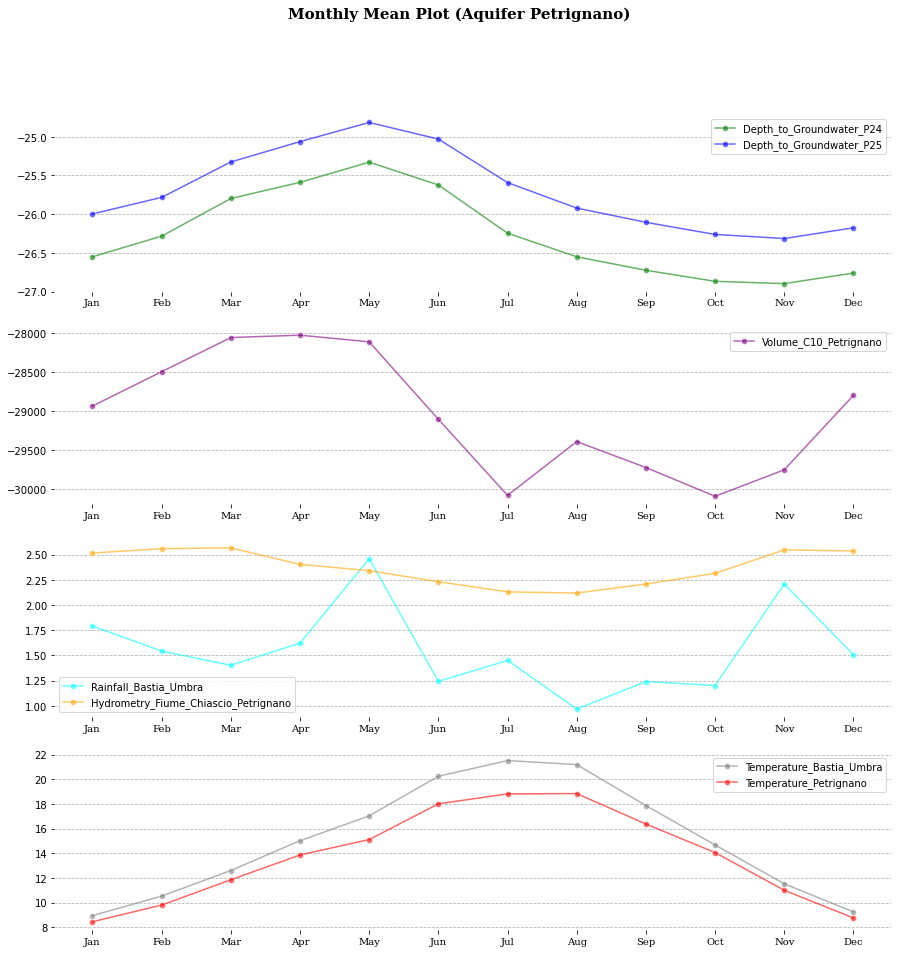

In [13]:
#monthly mean plot
ap_means_P24 = df.groupby('month').Depth_to_Groundwater_P24.mean().reset_index()
ap_means_P25 = df.groupby('month').Depth_to_Groundwater_P25.mean().reset_index()
ap_rain = df.groupby('month').Rainfall_Bastia_Umbra.mean().reset_index()
ap_temp_B = df.groupby('month').Temperature_Bastia_Umbra.mean().reset_index()
ap_temp_P = df.groupby('month').Temperature_Petrignano.mean().reset_index()
ap_C10 = df.groupby('month').Volume_C10_Petrignano.mean().reset_index()
ap_hydro = df.groupby('month').Hydrometry_Fiume_Chiascio_Petrignano.mean().reset_index()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 15))
plt.suptitle('Monthly Mean Plot (Aquifer Petrignano)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = ap_means_P24, x = 'month', y = 'Depth_to_Groundwater_P24', marker = 'o', color = 'green', label = 'Depth_to_Groundwater_P24', alpha = 0.6, 
             ax = ax1)
sns.lineplot(data = ap_means_P25, x = 'month', y = 'Depth_to_Groundwater_P25', marker = 'o', color = 'blue', label = 'Depth_to_Groundwater_P25', alpha = 0.6,
             ax = ax1)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(ap_temp_B.month[::1])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = ap_temp_B, x = 'month', y = 'Temperature_Bastia_Umbra', marker = 'o', color = 'grey', label = 'Temperature_Bastia_Umbra', alpha = 0.6, 
             ax = ax4)
sns.lineplot(data = ap_temp_P, x = 'month', y = 'Temperature_Petrignano', marker = 'o', color = 'red', label = 'Temperature_Petrignano', alpha = 0.6, ax = ax4)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(ap_temp_P.month[::1])
ax4.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = ap_rain, x = 'month', y = 'Rainfall_Bastia_Umbra', marker = 'o', color = 'cyan', label = 'Rainfall_Bastia_Umbra', alpha = 0.6, ax = ax3)
sns.lineplot(data = ap_hydro, x = 'month', y = 'Hydrometry_Fiume_Chiascio_Petrignano', marker = 'o', color = 'orange', 
             label = 'Hydrometry_Fiume_Chiascio_Petrignano', alpha = 0.6, ax = ax3)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(ap_rain.month[::1])
ax3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = ap_C10, x = 'month', y = 'Volume_C10_Petrignano', marker = 'o', color = 'purple', label = 'Volume_C10_Petrignano', alpha = 0.6, ax = ax2)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(ap_C10.month[::1])
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

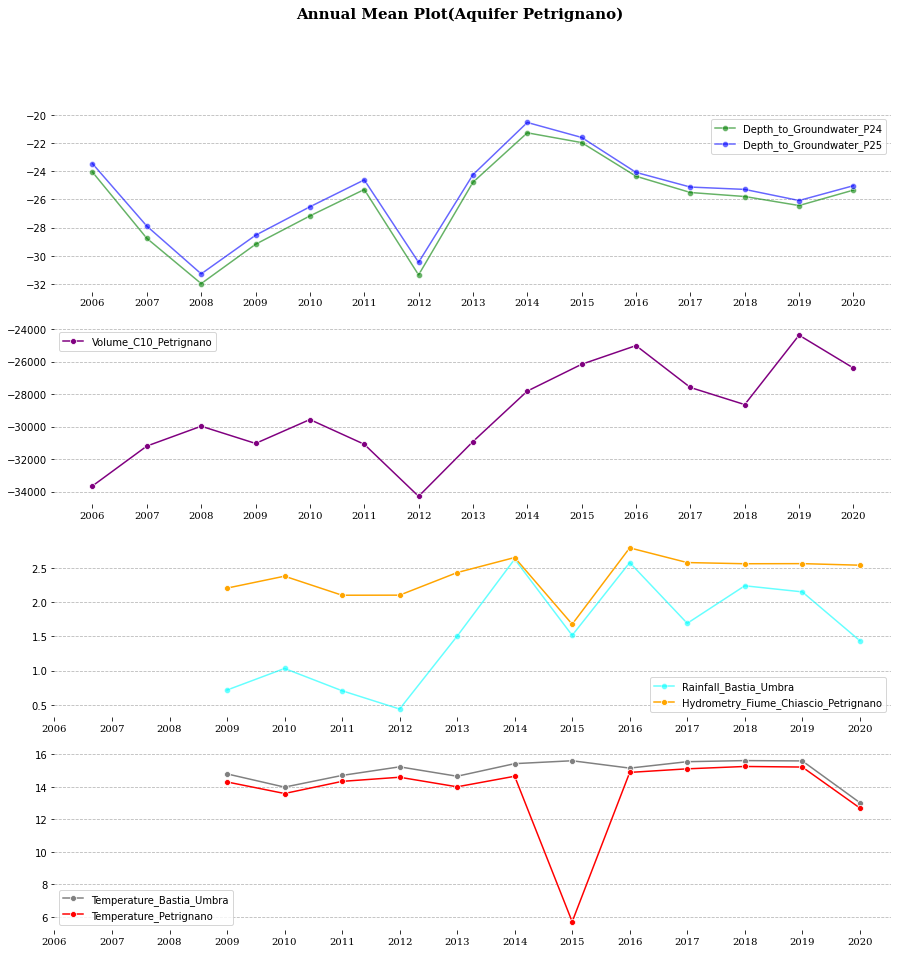

In [14]:
#annual mean plot
ap_means_P24_y = df.groupby('year').Depth_to_Groundwater_P24.mean().reset_index()
ap_means_P25_y = df.groupby('year').Depth_to_Groundwater_P25.mean().reset_index()
ap_rain_y = df.groupby('year').Rainfall_Bastia_Umbra.mean().reset_index()
ap_temp_B_y = df.groupby('year').Temperature_Bastia_Umbra.mean().reset_index()
ap_temp_P_y = df.groupby('year').Temperature_Petrignano.mean().reset_index()
ap_C10_y = df.groupby('year').Volume_C10_Petrignano.mean().reset_index()
ap_hydro_y = df.groupby('year').Hydrometry_Fiume_Chiascio_Petrignano.mean().reset_index()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 15))
plt.suptitle('Annual Mean Plot(Aquifer Petrignano)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = ap_means_P24_y, x = 'year', y = 'Depth_to_Groundwater_P24', marker = 'o', color = 'green', label = 'Depth_to_Groundwater_P24', alpha = 0.6,
             ax = ax1)
sns.lineplot(data = ap_means_P25_y, x = 'year', y = 'Depth_to_Groundwater_P25', marker = 'o', color = 'blue', label = 'Depth_to_Groundwater_P25', alpha = 0.6,
             ax = ax1)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(ap_temp_B_y.year[::1])
ax1.set_xticklabels(range(2006, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = ap_temp_B_y, x = 'year', y = 'Temperature_Bastia_Umbra', marker = 'o', color = 'gray', label = 'Temperature_Bastia_Umbra', alpha = 1, 
             ax = ax4)
sns.lineplot(data = ap_temp_P_y, x = 'year', y = 'Temperature_Petrignano', marker = 'o', color = 'red', label = 'Temperature_Petrignano', alpha = 1, ax = ax4)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(ap_temp_P_y.year[::1])
ax4.set_xticklabels(range(2006, 2021, 1), fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = ap_rain_y, x = 'year', y = 'Rainfall_Bastia_Umbra', marker = 'o', color = 'cyan', label = 'Rainfall_Bastia_Umbra', alpha = 0.6, ax = ax3)
sns.lineplot(data = ap_hydro_y, x = 'year', y = 'Hydrometry_Fiume_Chiascio_Petrignano', marker = 'o', color = 'orange', 
             label = 'Hydrometry_Fiume_Chiascio_Petrignano', alpha = 1, ax = ax3)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(ap_rain_y.year[::1])
ax3.set_xticklabels(range(2006, 2021, 1), fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = ap_C10_y, x = 'year', y = 'Volume_C10_Petrignano', marker = 'o', color = 'purple', label = 'Volume_C10_Petrignano', alpha = 1, ax = ax2)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(ap_C10_y.year[::1])
ax2.set_xticklabels(range(2006, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

# 3. Aquifer Doganella

In [15]:
print('The earliest date: \t%s' %datasets[2].index.values[[0, -1]][0])
print('The latest date: \t%s' %datasets[2].index.values[[0, -1]][1])

The earliest date: 	01/01/2004
The latest date: 	30/06/2020


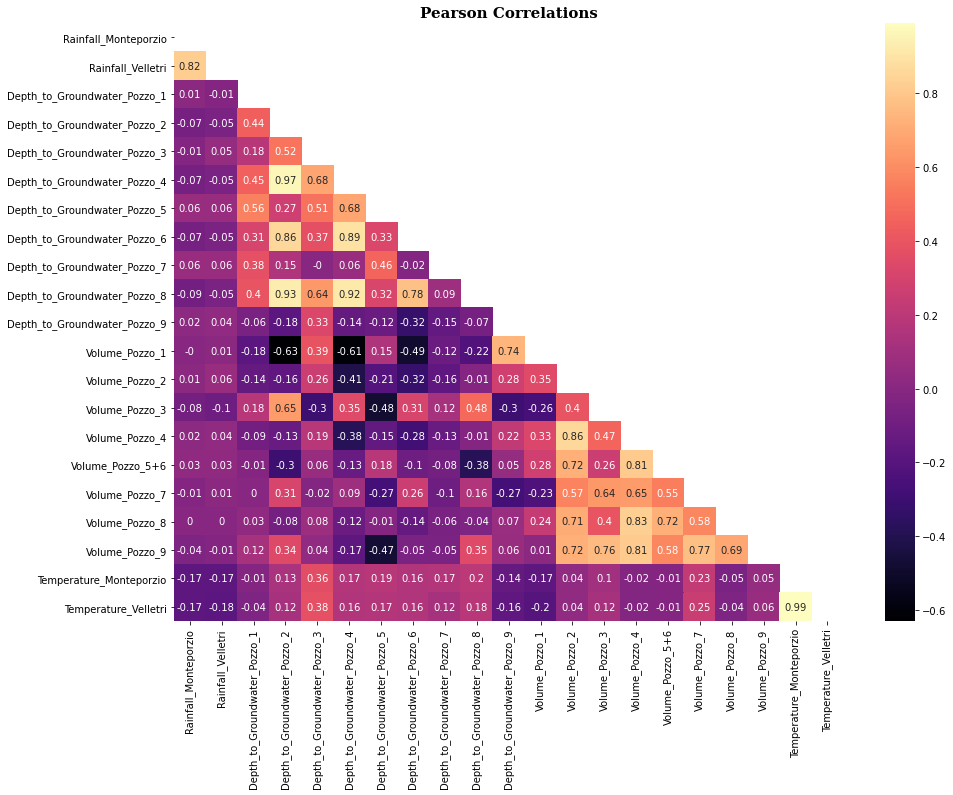

In [16]:
corr_plot(datasets[2])

In [17]:
df = Aquifer_Doganella.reset_index()
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month

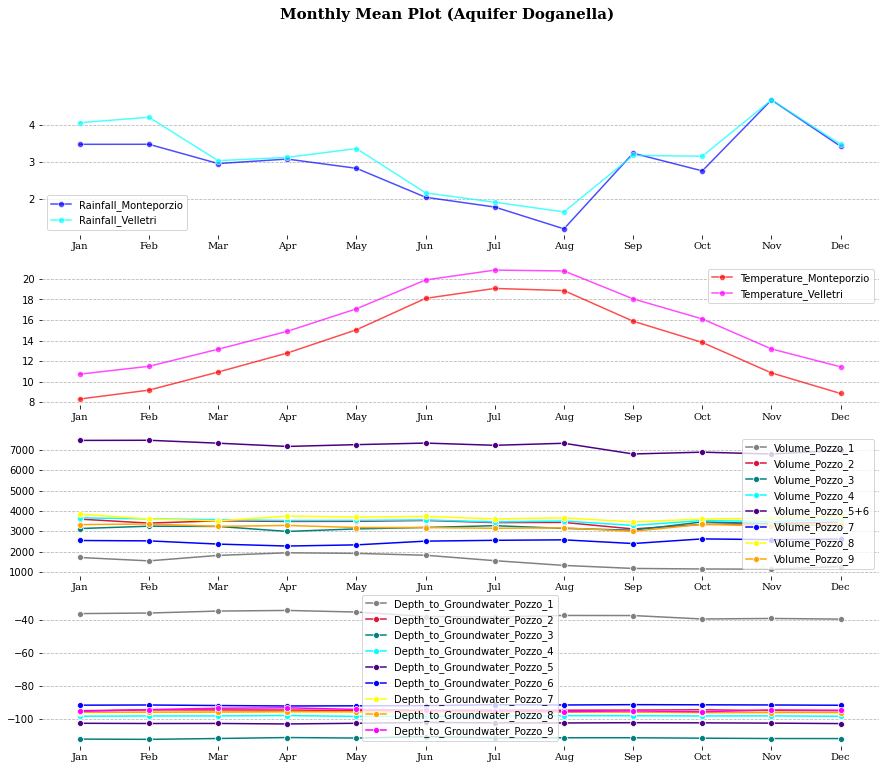

In [18]:
#monthly mean plot
ad_means = df.groupby('month').mean().reset_index()
rainfall_col = [col for col in ad_means.columns if 'Rainfall' in col]
temperature_col = [col for col in ad_means.columns if 'Temperature' in col]
volume_col = [col for col in ad_means.columns if 'Volume' in col]
groundwater_col = [col for col in ad_means.columns if 'Depth_to_Groundwater' in col]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 12))
plt.suptitle('Monthly Mean Plot (Aquifer Doganella)', size = 15, fontweight = 'bold', fontfamily = 'serif')

colors = ['blue', 'cyan']
n = 0
for i in rainfall_col:
    sns.lineplot(data = ad_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 0.7, ax = ax1)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(ad_means.month[::1])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['red', 'fuchsia']
n = 0
for i in temperature_col:
    sns.lineplot(data = ad_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 0.7, ax = ax2)
    n +=1

for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(ad_means.month[::1])
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['gray', 'crimson', 'teal', 'aqua', 'indigo','blue', 'yellow', 'orange']
n = 0
for i in volume_col:
    sns.lineplot(data = ad_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax3)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(ad_means.month[::1])
ax3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['gray', 'crimson', 'teal', 'aqua', 'indigo','blue', 'yellow', 'orange', 'fuchsia']
n = 0
for i in groundwater_col:
    sns.lineplot(data = ad_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax4)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(ad_means.month[::1])
ax4.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)

plt.show()

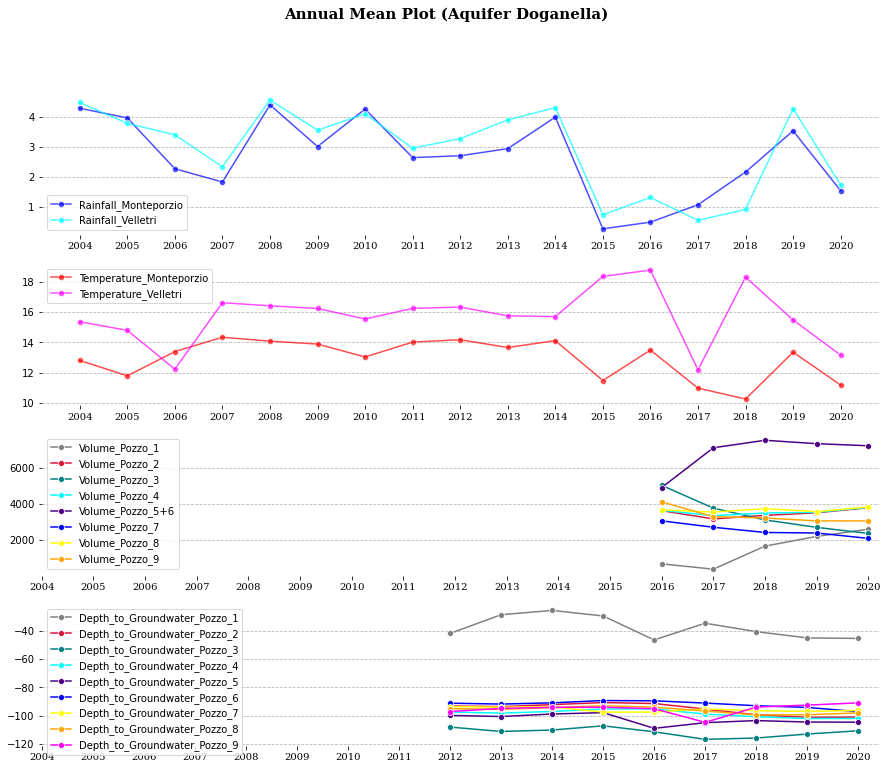

In [19]:
#annual mean plot
ad_means_y = df.groupby('year').mean().reset_index()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 12))
plt.suptitle('Annual Mean Plot (Aquifer Doganella)', size = 15, fontweight = 'bold', fontfamily = 'serif')

colors = ['blue', 'cyan']
n = 0
for i in rainfall_col:
    sns.lineplot(data = ad_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 0.7, ax = ax1)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(ad_means_y.year[::1])
ax1.set_xticklabels(range(2004, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['red', 'fuchsia']
n = 0
for i in temperature_col:
    sns.lineplot(data = ad_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 0.7, ax = ax2)
    n +=1

for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(ad_means_y.year[::1])
ax2.set_xticklabels(range(2004, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['gray', 'crimson', 'teal', 'aqua', 'indigo','blue', 'yellow', 'orange']
n = 0
for i in volume_col:
    sns.lineplot(data = ad_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax3)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(ad_means_y.year[::1])
ax3.set_xticklabels(range(2004, 2021, 1), fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['gray', 'crimson', 'teal', 'aqua', 'indigo','blue', 'yellow', 'orange', 'fuchsia']
n = 0
for i in groundwater_col:
    sns.lineplot(data = ad_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax4)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(ad_means_y.year[::1])
ax4.set_xticklabels(range(2004, 2021, 1), fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)

plt.show()

# 4. Aquifer Luco

In [20]:
print('The earliest date: \t%s' %datasets[3].index.values[[0, -1]][0])
print('The latest date: \t%s' %datasets[3].index.values[[0, -1]][1])

The earliest date: 	01/01/2000
The latest date: 	30/06/2020


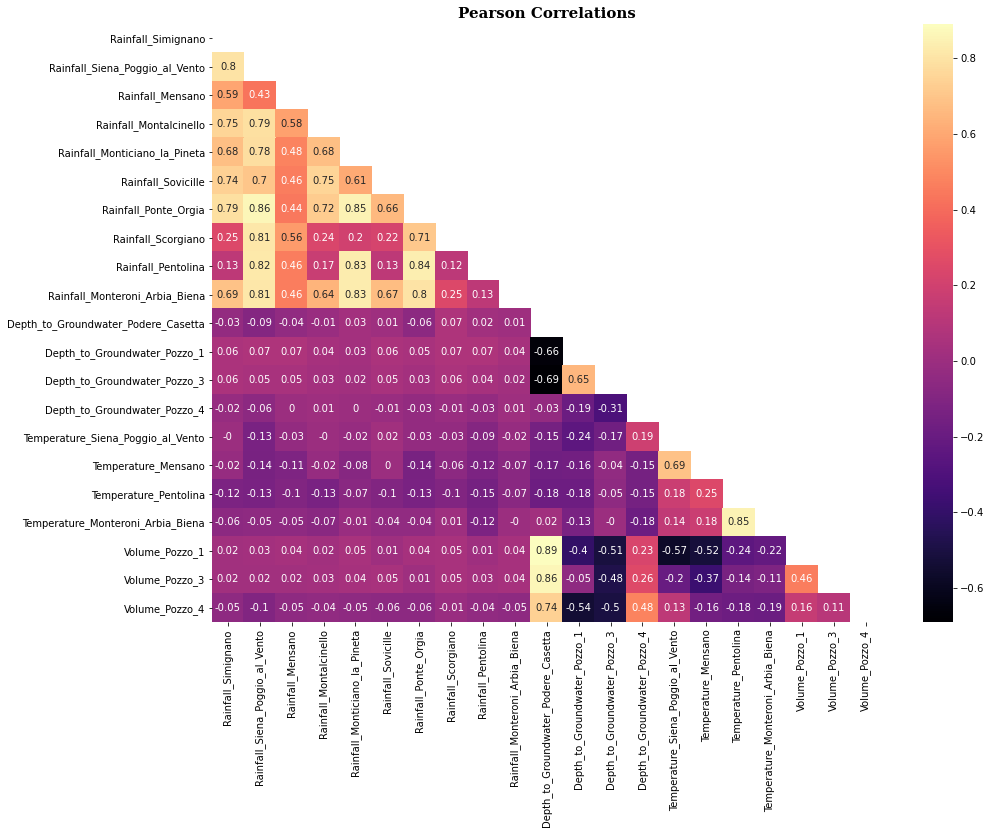

In [21]:
corr_plot(datasets[3])

In [22]:
df = Aquifer_Luco.reset_index()
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month

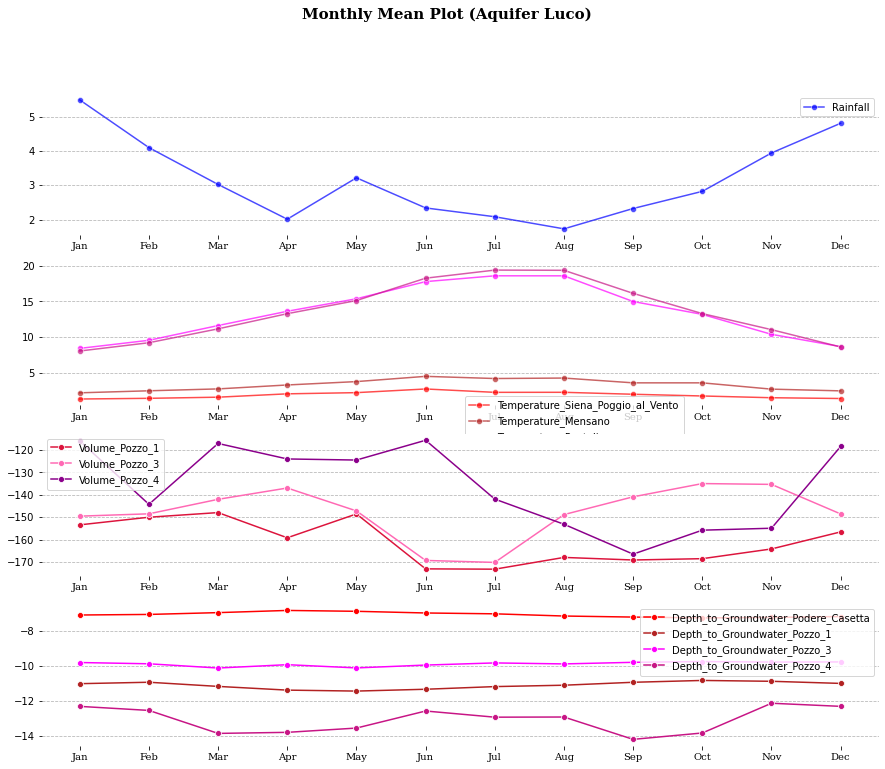

In [23]:
#monthly mean plot
al_means = df.groupby('month').mean().reset_index()
rainfall_col = [col for col in al_means.columns if 'Rainfall' in col]
temperature_col = [col for col in al_means.columns if 'Temperature' in col]
volume_col = [col for col in al_means.columns if 'Volume' in col]
hydrometry_col = [col for col in al_means.columns if 'Hydrometry' in col]
groundwater_col = [col for col in al_means.columns if 'Depth_to_Groundwater' in col]
al_means['rainfall'] = al_means[rainfall_col].mean(axis = 1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 12))
plt.suptitle('Monthly Mean Plot (Aquifer Luco)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = al_means, x = 'month', y = 'rainfall', marker = 'o', color = 'blue', label = 'Rainfall', alpha = 0.7, ax = ax1)

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(al_means.month[::1])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['red', 'firebrick', 'fuchsia', 'mediumvioletred']
n = 0
for i in temperature_col:
    sns.lineplot(data = al_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 0.7, ax = ax2)
    n +=1

for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(al_means.month[::1])
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend(bbox_to_anchor = (0.5, 0.1))
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['crimson', 'hotpink', 'darkmagenta']
n = 0
for i in volume_col:
    sns.lineplot(data = al_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax3)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(al_means.month[::1])
ax3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['red', 'firebrick', 'fuchsia', 'mediumvioletred']
n = 0
for i in groundwater_col:
    sns.lineplot(data = al_means, x = 'month', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax4)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(al_means.month[::1])
ax4.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)

plt.show()

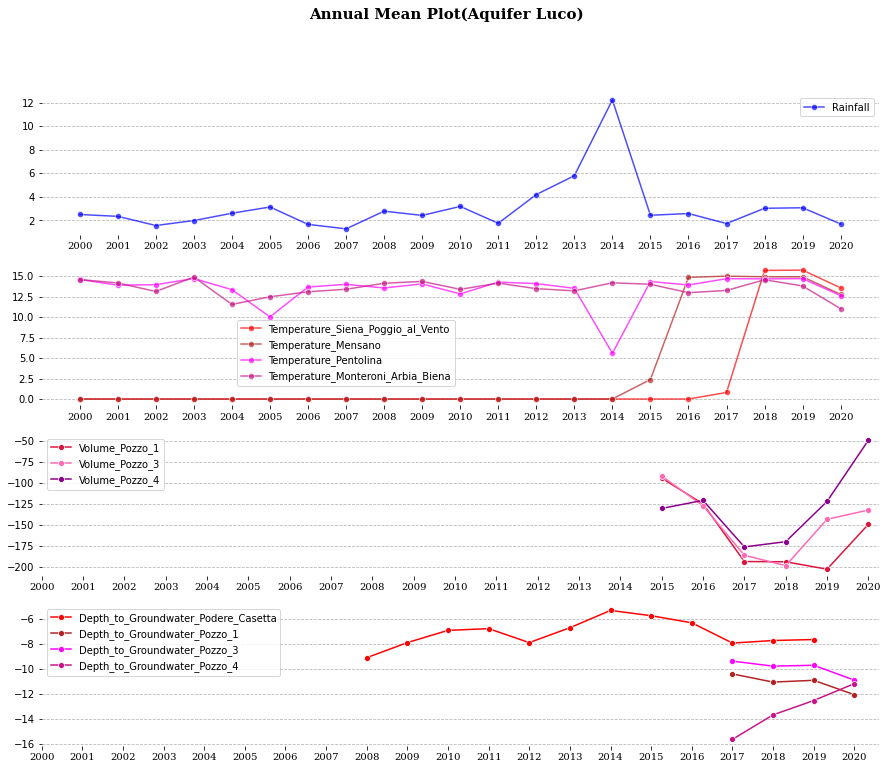

In [24]:
#annual mean plot
al_means_y = df.groupby('year').mean().reset_index()
al_means_y['rainfall'] = al_means_y[rainfall_col].mean(axis = 1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 12))
plt.suptitle('Annual Mean Plot(Aquifer Luco)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = al_means_y, x = 'year', y = 'rainfall', marker = 'o', color = 'blue', label = 'Rainfall', alpha = 0.7, ax = ax1)

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(al_means_y.year[::1])
ax1.set_xticklabels(range(2000, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['red', 'firebrick', 'fuchsia', 'mediumvioletred']
n = 0
for i in temperature_col:
    sns.lineplot(data = al_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 0.7, ax = ax2)
    n +=1

for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(al_means_y.year[::1])
ax2.set_xticklabels(range(2000, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend(bbox_to_anchor = (0.5, 0.1))
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['crimson', 'hotpink', 'darkmagenta']
n = 0
for i in volume_col:
    sns.lineplot(data = al_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax3)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(al_means_y.year[::1])
ax3.set_xticklabels(range(2000, 2021, 1), fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)



colors = ['red', 'firebrick', 'fuchsia', 'mediumvioletred']
n = 0
for i in groundwater_col:
    sns.lineplot(data = al_means_y, x = 'year', y = i, marker = 'o', color = colors[n], label = i, alpha = 1, ax = ax4)
    n += 1

for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(al_means_y.year[::1])
ax4.set_xticklabels(range(2000, 2021, 1), fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)

plt.show()

# 5. Water Spring Amiata

In [25]:
print('The earliest date: \t%s' %datasets[4].index.values[[0, -1]][0])
print('The latest date: \t%s' %datasets[4].index.dropna().values[[0, -1]][1])

The earliest date: 	01/01/2000
The latest date: 	30/06/2020


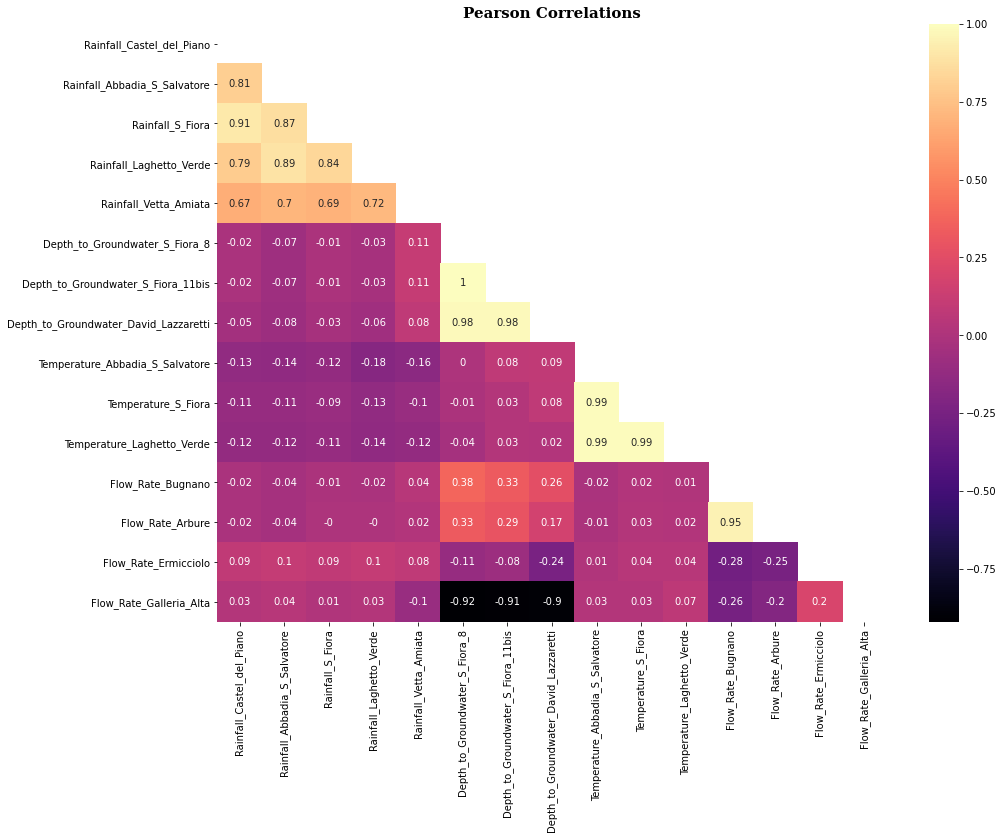

In [26]:
corr_plot(datasets[4])

In [27]:
df = Water_Spring_Amiata.reset_index()
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month

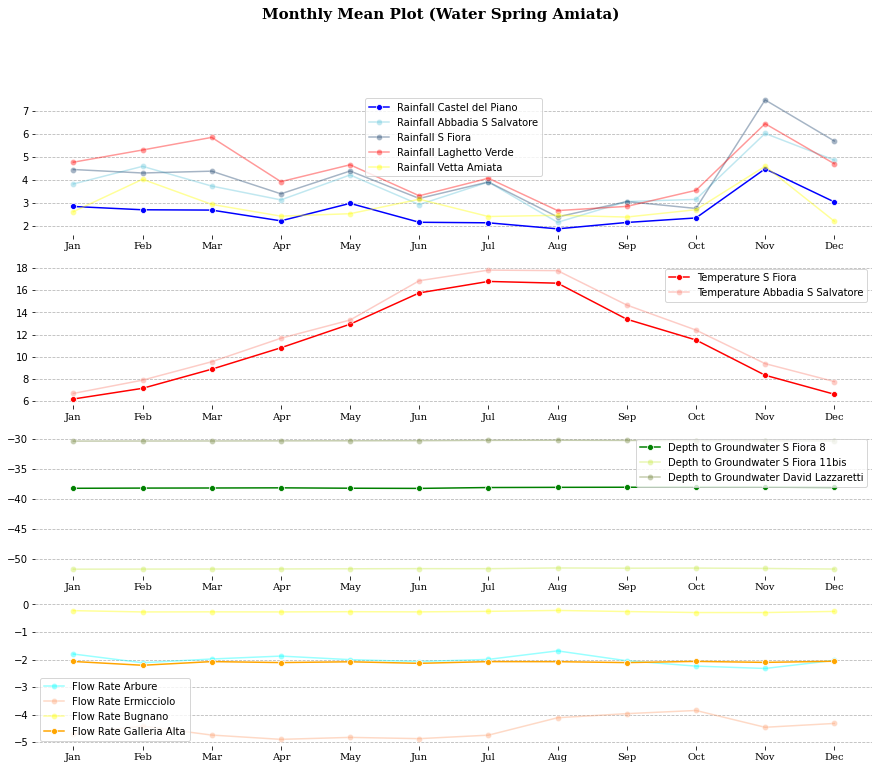

In [28]:
#monthly mean plot
wsa_means = df.groupby('month').mean().reset_index()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 12))
plt.suptitle('Monthly Mean Plot (Water Spring Amiata)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = wsa_means, x = 'month', y = 'Rainfall_Castel_del_Piano', marker = 'o', color = 'blue', label = 'Rainfall Castel del Piano', alpha = 1, 
             ax = ax1)
sns.lineplot(data = wsa_means, x = 'month', y = 'Rainfall_Abbadia_S_Salvatore', marker = 'o', color = '#63C5DA', label = 'Rainfall Abbadia S Salvatore', 
             alpha = 0.4, ax = ax1)
sns.lineplot(data = wsa_means, x = 'month', y = 'Rainfall_S_Fiora', marker = 'o', color = '#1F456E', label = 'Rainfall S Fiora', alpha = 0.4, ax = ax1)
sns.lineplot(data = wsa_means, x = 'month', y = 'Rainfall_Laghetto_Verde', marker = 'o', color = 'red', label = 'Rainfall Laghetto Verde', alpha = 0.4, ax = ax1)
sns.lineplot(data = wsa_means, x = 'month', y = 'Rainfall_Vetta_Amiata', marker = 'o', color = 'yellow', label = 'Rainfall Vetta Amiata', alpha = 0.4, ax = ax1)

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(wsa_means.month[::1])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = wsa_means, x = 'month', y = 'Temperature_S_Fiora', marker = 'o', color = 'red', label = 'Temperature S Fiora', alpha = 1, ax = ax2)
sns.lineplot(data = wsa_means, x = 'month', y = 'Temperature_Abbadia_S_Salvatore', marker = 'o', color = '#FA8072', label = 'Temperature Abbadia S Salvatore', 
             alpha = 0.4, ax = ax2)

for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(wsa_means.month[::1])
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = wsa_means, x = 'month', y = 'Depth_to_Groundwater_S_Fiora_8', marker = 'o', color = 'green', label = 'Depth to Groundwater S Fiora 8', 
             alpha = 1, ax = ax3)
sns.lineplot(data = wsa_means, x = 'month', y = 'Depth_to_Groundwater_S_Fiora_11bis', marker = 'o', color = '#C7EA46', 
             label = 'Depth to Groundwater S Fiora 11bis', alpha = 0.4, ax = ax3)
sns.lineplot(data = wsa_means, x = 'month', y = wsa_means.Depth_to_Groundwater_David_Lazzaretti / 10, marker = 'o', color = '#708238', 
             label = 'Depth to Groundwater David Lazzaretti', alpha = 0.4, ax = ax3)

for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(wsa_means.month[::1])
ax3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = wsa_means, x = 'month', y = 'Flow_Rate_Arbure', marker = 'o', color = 'cyan', label = 'Flow Rate Arbure', alpha = 0.4, ax = ax4)
sns.lineplot(data = wsa_means, x = 'month', y = 'Flow_Rate_Ermicciolo', marker = 'o', color = '#FDA172', label = 'Flow Rate Ermicciolo', alpha = 0.4, ax = ax4)
sns.lineplot(data = wsa_means, x = 'month', y = 'Flow_Rate_Bugnano', marker = 'o', color = 'yellow', label = 'Flow Rate Bugnano', alpha = 0.4, ax = ax4)
sns.lineplot(data = wsa_means, x = 'month', y = wsa_means.Flow_Rate_Galleria_Alta / 10, marker = 'o', color = 'orange', label = 'Flow Rate Galleria Alta', 
             alpha = 1, ax = ax4)

for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(wsa_means.month[::1])
ax4.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)

plt.show()

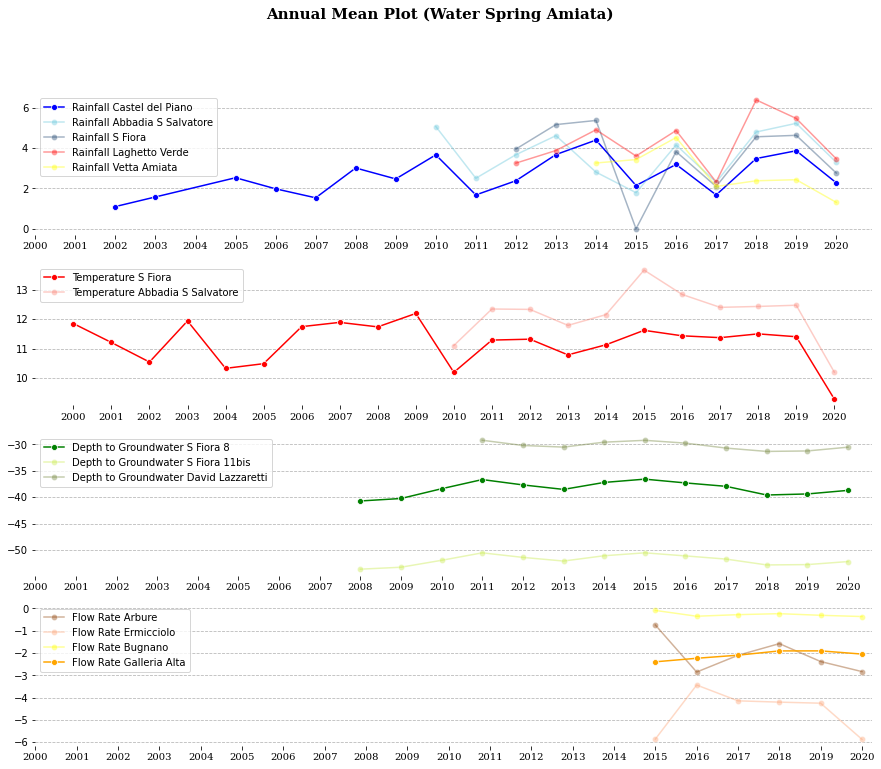

In [29]:
#annual mean plot
wsa_means_y = df.groupby('year').mean().reset_index()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 12))
plt.suptitle('Annual Mean Plot (Water Spring Amiata)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = wsa_means_y, x = 'year', y = 'Rainfall_Castel_del_Piano', marker = 'o', color = 'blue', label = 'Rainfall Castel del Piano', alpha = 1,
             ax = ax1)
sns.lineplot(data = wsa_means_y, x = 'year', y = 'Rainfall_Abbadia_S_Salvatore', marker = 'o',color = '#63C5DA', label = 'Rainfall Abbadia S Salvatore', 
             alpha = 0.4, ax = ax1)
sns.lineplot(data = wsa_means_y, x = 'year', y = 'Rainfall_S_Fiora', marker = 'o', color = '#1F456E', label = 'Rainfall S Fiora', alpha = 0.4, ax = ax1)
sns.lineplot(data = wsa_means_y, x = 'year', y = 'Rainfall_Laghetto_Verde', marker = 'o', color = 'red', label = 'Rainfall Laghetto Verde', alpha = 0.4, ax = ax1)
sns.lineplot(data = wsa_means_y, x = 'year', y = 'Rainfall_Vetta_Amiata', marker = 'o', color = 'yellow', label = 'Rainfall Vetta Amiata', alpha = 0.4, ax = ax1)

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(wsa_means_y.year[::1])
ax1.set_xticklabels(range(2000, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = wsa_means_y, x = 'year', y = 'Temperature_S_Fiora', marker = 'o', color = 'red', label = 'Temperature S Fiora', alpha = 1, ax = ax2)
sns.lineplot(data = wsa_means_y, x = 'year', y = 'Temperature_Abbadia_S_Salvatore', marker = 'o', color = '#FA8072', label = 'Temperature Abbadia S Salvatore', 
             alpha = 0.4, ax = ax2)

for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(wsa_means_y.year[::1])
ax2.set_xticklabels(range(2000, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = wsa_means_y, x = 'year', y = 'Depth_to_Groundwater_S_Fiora_8', marker = 'o', color = 'green', label = 'Depth to Groundwater S Fiora 8', 
             alpha = 1, ax = ax3)
sns.lineplot(data = wsa_means_y, x = 'year', y = 'Depth_to_Groundwater_S_Fiora_11bis', marker = 'o', color = '#C7EA46',
             label = 'Depth to Groundwater S Fiora 11bis', alpha = 0.4, ax = ax3)
sns.lineplot(data = wsa_means_y, x = 'year', y = wsa_means_y.Depth_to_Groundwater_David_Lazzaretti / 10, marker = 'o', color = '#708238', 
             label = 'Depth to Groundwater David Lazzaretti', alpha = 0.4, ax = ax3)

for i in ['top', 'right', 'bottom', 'left']:
        ax3.spines[i].set_visible(False)

ax3.set_xticks(wsa_means_y.year[::1])
ax3.set_xticklabels(range(2000, 2021, 1), fontfamily = 'serif')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = wsa_means_y, x = 'year', y = 'Flow_Rate_Arbure', marker = 'o', color = '#8D4004', label = 'Flow Rate Arbure', alpha = 0.4, ax = ax4)
sns.lineplot(data = wsa_means_y, x = 'year', y = 'Flow_Rate_Ermicciolo', marker = 'o', color = '#FDA172', label = 'Flow Rate Ermicciolo', alpha = 0.4, ax = ax4)
sns.lineplot(data = wsa_means_y, x = 'year', y = 'Flow_Rate_Bugnano', marker = 'o', color = 'yellow', label = 'Flow Rate Bugnano', alpha = 0.4, ax = ax4)
sns.lineplot(data = wsa_means_y, x = 'year', y = wsa_means_y.Flow_Rate_Galleria_Alta / 10, marker = 'o', color = 'orange', label = 'Flow Rate Galleria Alta', 
             alpha = 1, ax = ax4)

for i in ['top', 'right', 'bottom', 'left']:
        ax4.spines[i].set_visible(False)

ax4.set_xticks(wsa_means_y.year[::1])
ax4.set_xticklabels(range(2000, 2021, 1), fontfamily = 'serif')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(axis = 'y', linestyle = '--', alpha = 0.9)

plt.show()

# 6. Water Spring Madonna di Canneto

In [30]:
print('The earliest date: \t%s' %datasets[5].index.values[[0, -1]][0])
print('The latest date: \t%s' %datasets[5].index.values[[0, -1]][1])

The earliest date: 	01/01/2012
The latest date: 	nan


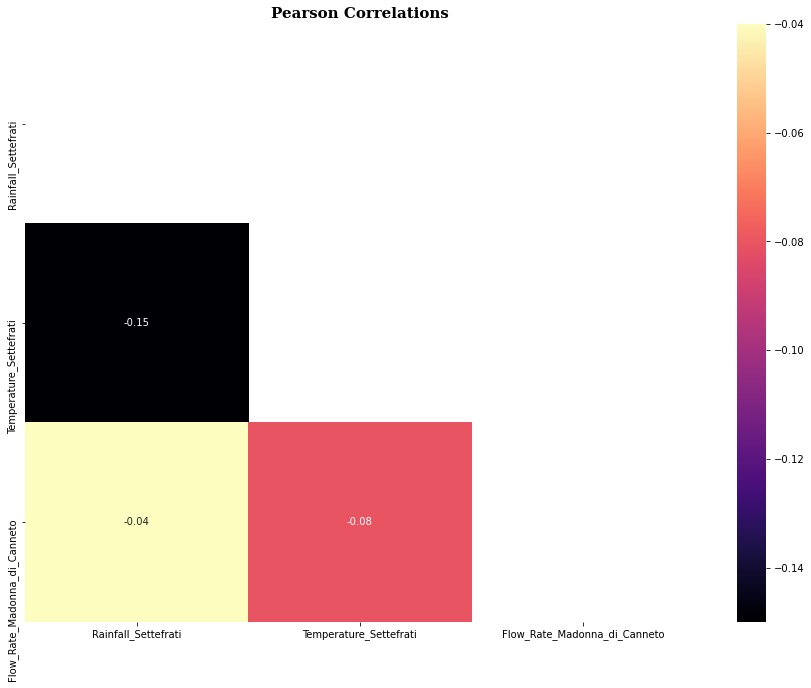

In [31]:
corr_plot(datasets[5])

In [32]:
df = Water_Spring_Madonna_di_Canneto[:-9].reset_index()
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month

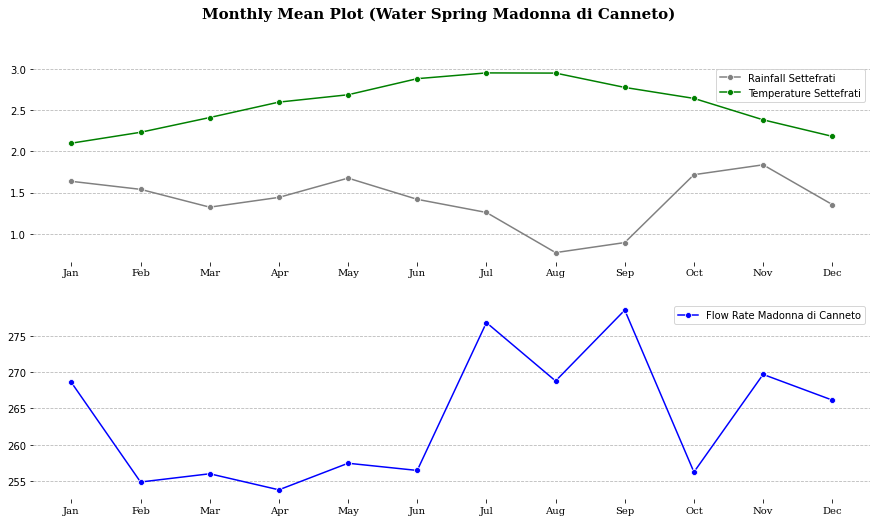

In [33]:
#monthly mean plot
ws_means = df.groupby('month').Flow_Rate_Madonna_di_Canneto.mean().reset_index()
ws_rain = np.log(df.groupby('month').Rainfall_Settefrati.mean()).reset_index()
ws_temp = np.log(df.groupby('month').Temperature_Settefrati.mean()).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 8))
plt.suptitle('Monthly Mean Plot (Water Spring Madonna di Canneto)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = ws_rain, x = 'month', y = 'Rainfall_Settefrati', marker = 'o', color = 'gray', label = 'Rainfall Settefrati', alpha = 1, ax = ax1)
sns.lineplot(data = ws_temp, x = 'month', y = 'Temperature_Settefrati', marker = 'o', color = 'green', label = 'Temperature Settefrati', alpha = 1, ax = ax1)

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(ws_means.month[::1])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = ws_means, x = 'month', y = 'Flow_Rate_Madonna_di_Canneto', marker = 'o', color = 'blue', label = 'Flow Rate Madonna di Canneto', ax = ax2)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(ws_means.month[::1])
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

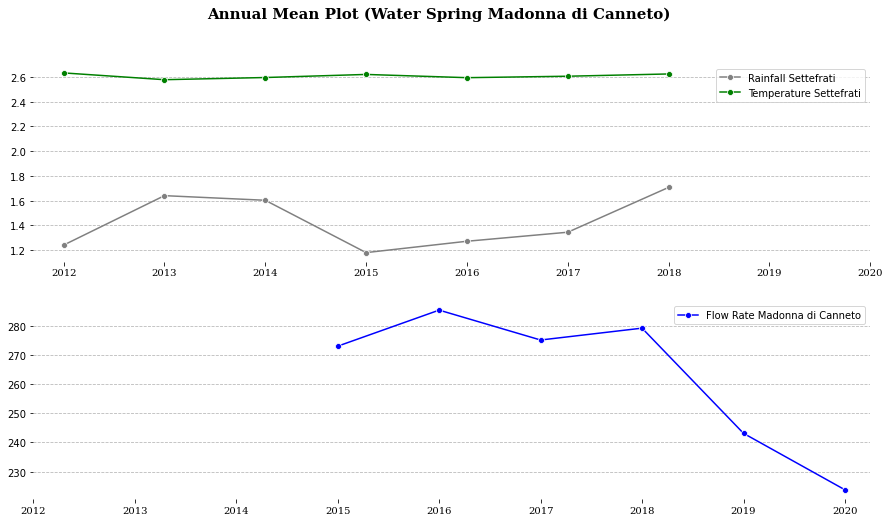

In [34]:
#annual mean plot
ws_means_y = df.groupby('year').Flow_Rate_Madonna_di_Canneto.mean().reset_index()
ws_rain_y = np.log(df.groupby('year').Rainfall_Settefrati.mean()).reset_index()
ws_temp_y = np.log(df.groupby('year').Temperature_Settefrati.mean()).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 8))
plt.suptitle('Annual Mean Plot (Water Spring Madonna di Canneto)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = ws_rain_y, x = 'year', y = 'Rainfall_Settefrati', ax = ax1, marker = 'o', color = 'gray', label = 'Rainfall Settefrati', alpha = 1)
sns.lineplot(data = ws_temp_y, x = 'year', y = 'Temperature_Settefrati', ax = ax1, marker = 'o', color = 'green', label = 'Temperature Settefrati', alpha = 1)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(ws_means_y.year[::1])
ax1.set_xticklabels(range(2012, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = ws_means_y, x = 'year', y = 'Flow_Rate_Madonna_di_Canneto', marker = 'o', ax = ax2, color = 'blue', label = 'Flow Rate Madonna di Canneto')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(ws_means_y.year[::1])
ax2.set_xticklabels(range(2012, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

# 7. Water Spring Lupa

In [35]:
print('The earliest date: \t%s' %datasets[6].index.values[[0, -1]][0])
print('The latest date: \t%s' %datasets[6].index.values[[0, -1]][1])

The earliest date: 	01/01/2009
The latest date: 	30/06/2020


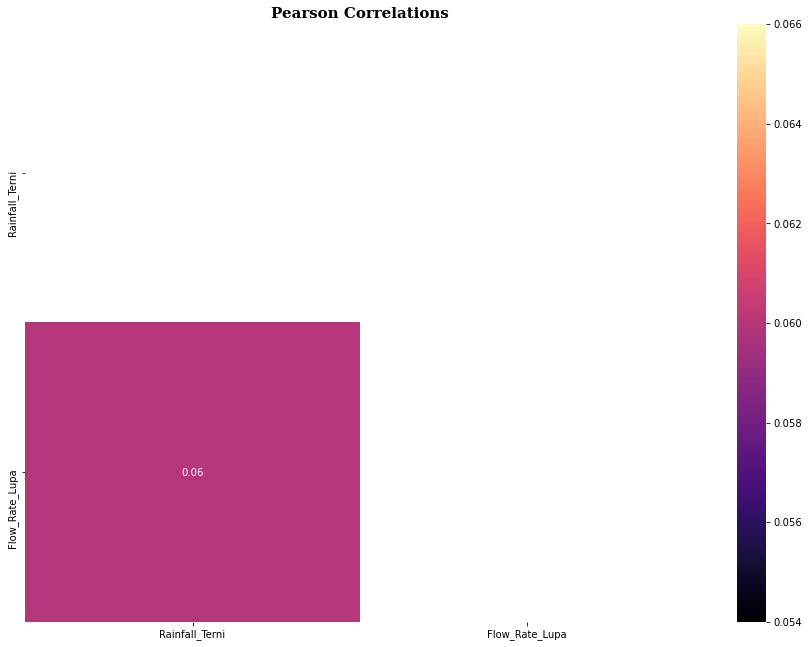

In [36]:
corr_plot(datasets[6])

In [37]:
df = Water_Spring_Lupa.reset_index()
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month

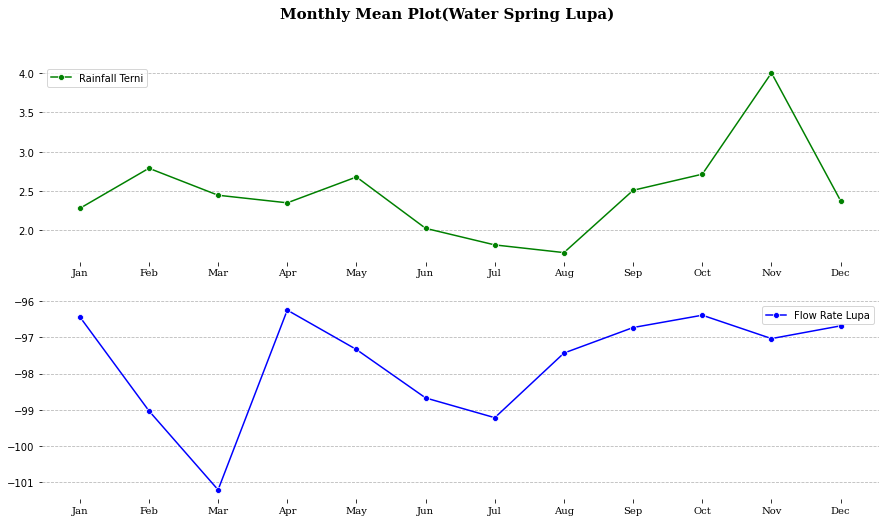

In [38]:
#monthly mean plot
wsl_means = df.groupby('month').Flow_Rate_Lupa.mean().reset_index()
wsl_rain = df.groupby('month').Rainfall_Terni.mean().reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 8))
plt.suptitle('Monthly Mean Plot(Water Spring Lupa)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = wsl_rain, x = 'month', y = 'Rainfall_Terni', marker = 'o', color = 'green', label = 'Rainfall Terni', alpha = 1, ax = ax1)

for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(wsl_means.month[::1])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)



sns.lineplot(data = wsl_means, x = 'month', y = 'Flow_Rate_Lupa', marker = 'o', color = 'blue', label = 'Flow Rate Lupa', ax = ax2)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(wsl_means.month[::1])
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

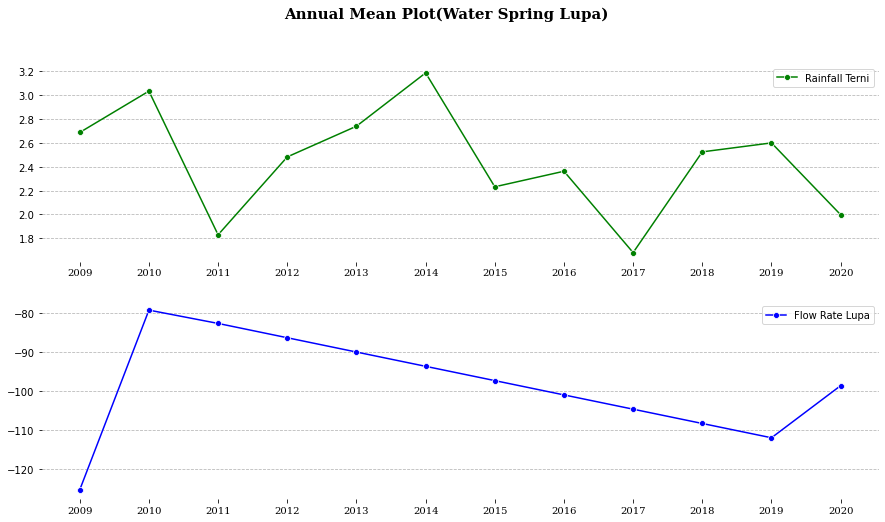

In [39]:
#annual mean plot
wsl_means_y = df.groupby('year').Flow_Rate_Lupa.mean().reset_index()
wsl_rain_y = df.groupby('year').Rainfall_Terni.mean().reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 8))
plt.suptitle('Annual Mean Plot(Water Spring Lupa)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = wsl_rain_y, x = 'year', y = 'Rainfall_Terni', ax = ax1, marker = 'o', color = 'green', label = 'Rainfall Terni', alpha = 1)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(wsl_means_y.year[::1])
ax1.set_xticklabels(range(2009, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = wsl_means_y, x = 'year', y = 'Flow_Rate_Lupa', marker = 'o', ax = ax2, color = 'blue', label = 'Flow Rate Lupa')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(wsl_means_y.year[::1])
ax2.set_xticklabels(range(2009, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

# 8. River Arno

In [40]:
print('The earliest date: \t%s' %datasets[7].index.values[[0, -1]][0])
print('The latest date: \t%s' %datasets[7].index.values[[0, -1]][1])

The earliest date: 	01/01/1998
The latest date: 	30/06/2020


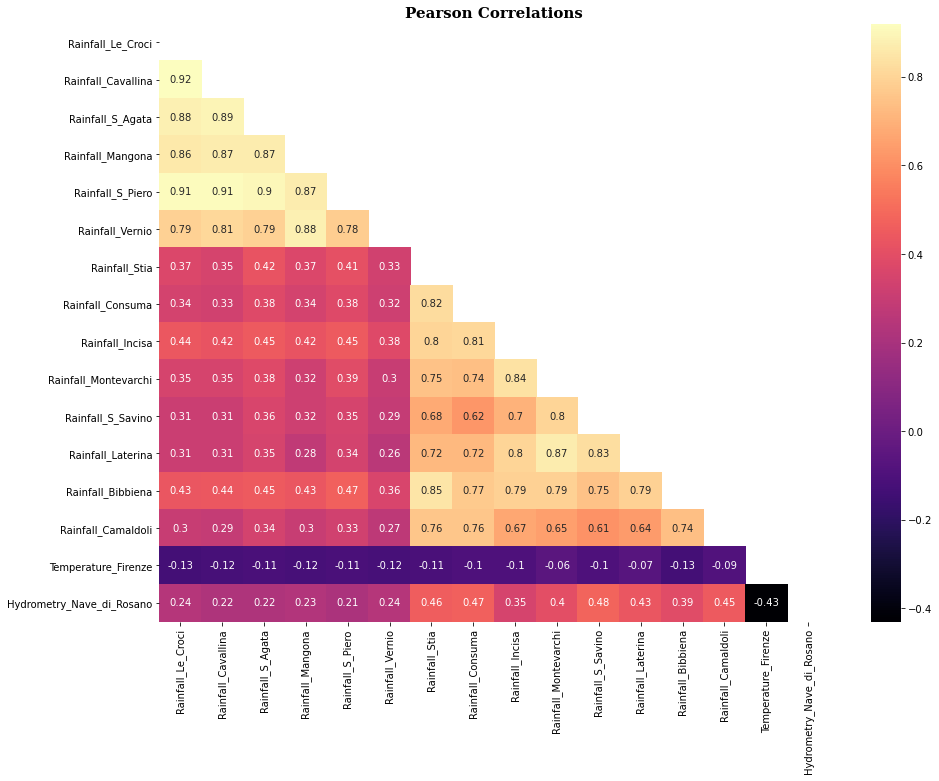

In [41]:
corr_plot(datasets[7])

In [42]:
df = River_Arno[['Hydrometry_Nave_di_Rosano', 'Temperature_Firenze']].reset_index()
df['rainfall'] = River_Arno.iloc[:, 0:-2].sum(axis = 1).values
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month

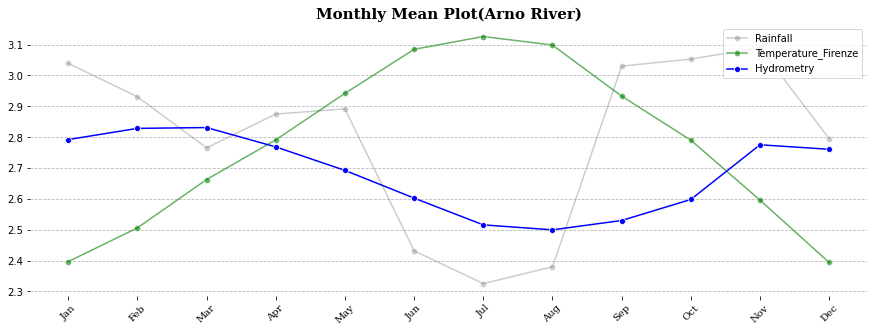

In [43]:
#monthly mean plot
r_means = np.log(df.groupby('month').Hydrometry_Nave_di_Rosano.mean() * 10).reset_index()
r_rain = np.log(df.groupby('month').rainfall.mean()).reset_index()
r_temp= np.log(df.groupby('month').Temperature_Firenze.mean()).reset_index()

fig, ax = plt.subplots(figsize = (15, 5))
plt.title('Monthly Mean Plot(Arno River)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = r_rain, x = 'month', y = 'rainfall', marker = 'o', color = 'gray', label = 'Rainfall', alpha = 0.4)
plt.xticks(rotation = 45)
sns.lineplot(data = r_temp, x = 'month', y = 'Temperature_Firenze', marker = 'o', color = 'green', label = 'Temperature_Firenze', alpha = 0.6)
plt.xticks(rotation = 45)
sns.lineplot(data = r_means, x = 'month', y = 'Hydrometry_Nave_di_Rosano', marker = 'o', color = 'blue', label = 'Hydrometry')
plt.xticks(rotation = 45)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_visible(False)

ax.set_xticks(r_means.month[::1])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

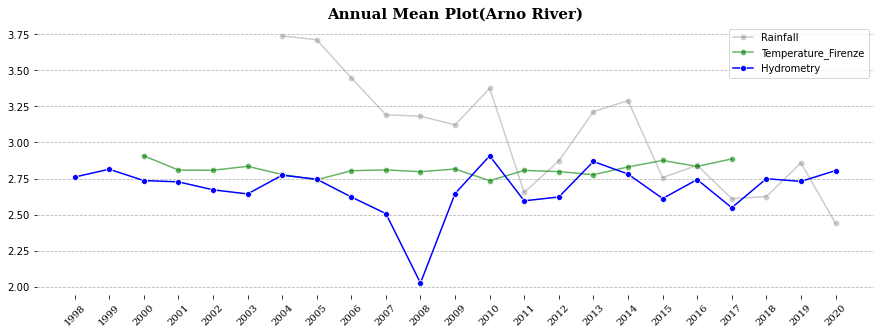

In [44]:
#annual mean plot
r_means_y = np.log(df.groupby('year').Hydrometry_Nave_di_Rosano.mean() * 10).reset_index()
r_rain_y = np.log(df.groupby('year').rainfall.mean()).reset_index()
r_temp_y = np.log(df.groupby('year').Temperature_Firenze.mean()).reset_index()


fig, ax = plt.subplots(figsize = (15, 5))
plt.title('Annual Mean Plot(Arno River)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = r_rain_y, x = 'year', y = 'rainfall', marker = 'o', color = 'gray', label = 'Rainfall', alpha = 0.4)
plt.xticks(rotation = 45)
sns.lineplot(data = r_temp_y, x = 'year', y = 'Temperature_Firenze', marker = 'o', color = 'green', label = 'Temperature_Firenze', alpha = 0.6)
plt.xticks(rotation = 45)
sns.lineplot(data = r_means_y, x = 'year', y = 'Hydrometry_Nave_di_Rosano', marker = 'o', color = 'blue', label = 'Hydrometry')
plt.xticks(rotation = 45)
    
for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_visible(False)

ax.set_xticks(r_means_y.year[::1])
ax.set_xticklabels(range(1998, 2021, 1), fontfamily = 'serif')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

# 9. Lake Bilancino

In [45]:
print('The earliest date: \t%s' %datasets[8].index.values[[0, -1]][0])
print('The latest date: \t%s' %datasets[8].index.values[[0, -1]][1])

The earliest date: 	03/06/2002
The latest date: 	30/06/2020


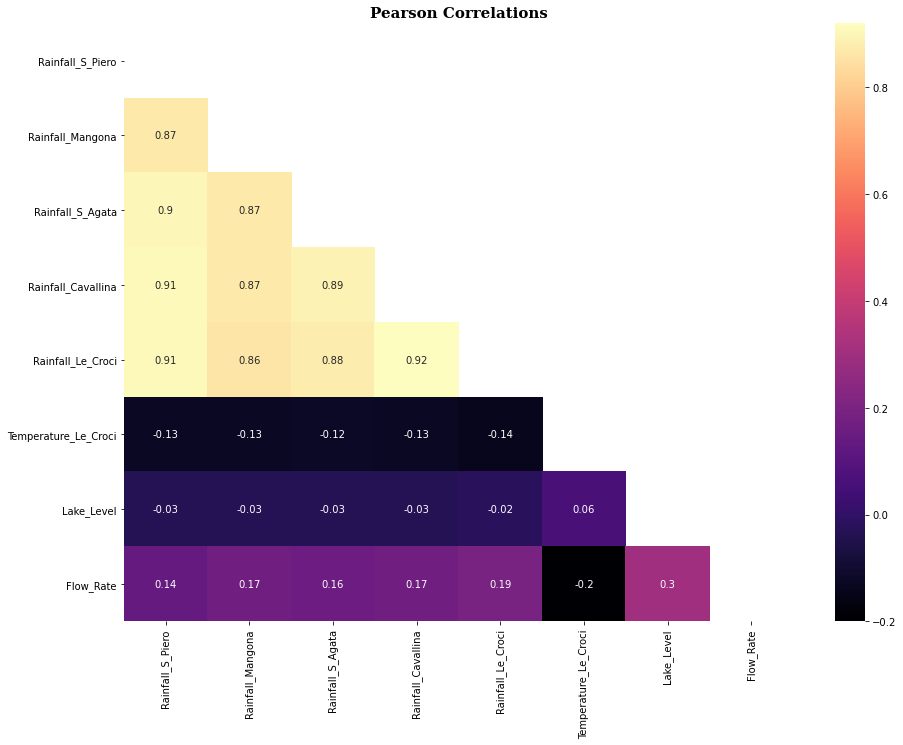

In [46]:
corr_plot(datasets[8])

In [47]:
df = Lake_Bilancino[['Lake_Level', 'Flow_Rate', 'Temperature_Le_Croci']].reset_index()
df['rainfall'] = Lake_Bilancino.iloc[:, 0:-3].sum(axis = 1).values
df['year'] = pd.to_datetime(df.Date).dt.year
df['month'] = pd.to_datetime(df.Date).dt.month

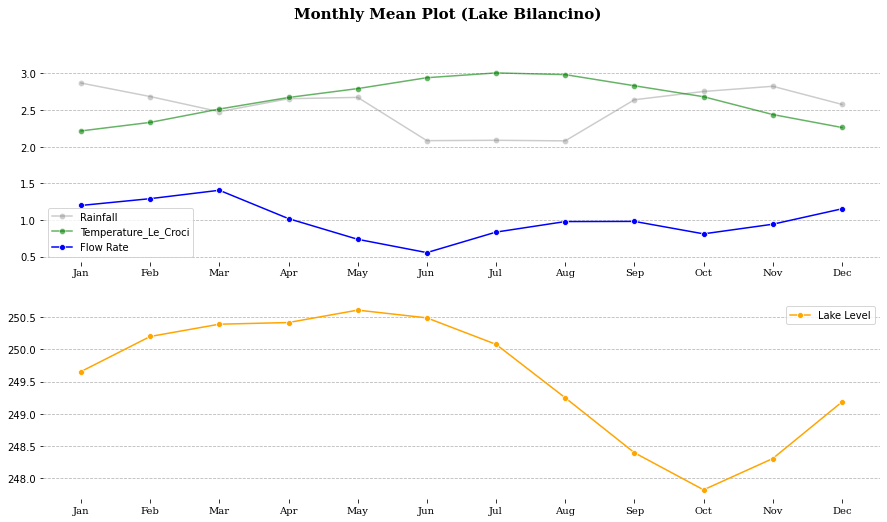

In [48]:
#monthly mean plot
l_means = np.log(df.groupby('month').Flow_Rate.mean()).reset_index()
l_means_LL = df.groupby('month').Lake_Level.mean().reset_index()
l_rain = np.log(df.groupby('month').rainfall.mean()).reset_index()
l_temp = np.log(df.groupby('month').Temperature_Le_Croci.mean()).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 8))
plt.suptitle('Monthly Mean Plot (Lake Bilancino)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = l_rain, x = 'month', y = 'rainfall', ax = ax1, marker = 'o', color = 'gray', label = 'Rainfall', alpha = 0.4)
sns.lineplot(data = l_temp, x = 'month', y = 'Temperature_Le_Croci', ax = ax1, marker = 'o', color = 'green', label = 'Temperature_Le_Croci', alpha = 0.6)
sns.lineplot(data = l_means, x = 'month', y = 'Flow_Rate', ax = ax1, marker = 'o', color = 'blue', label = 'Flow Rate')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(l_means.month[::1])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = l_means_LL, x = 'month', y = 'Lake_Level', ax = ax2, marker = 'o', color = 'orange', label = 'Lake Level')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(l_means_LL.month[::1])
ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

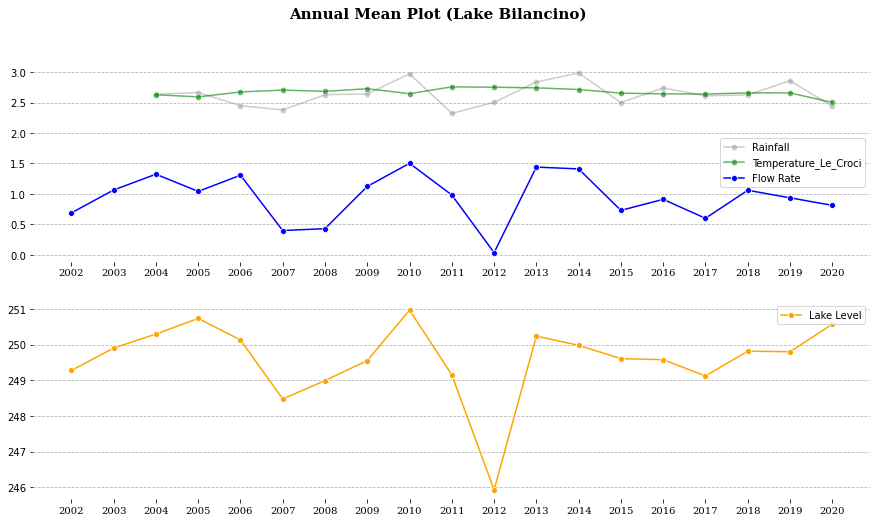

In [49]:
#annual mean plot
l_means_y = np.log(df.groupby('year').Flow_Rate.mean()).reset_index()
l_means_LL_y = df.groupby('year').Lake_Level.mean().reset_index()
l_rain_y = np.log(df.groupby('year').rainfall.mean()).reset_index()
l_temp_y = np.log(df.groupby('year').Temperature_Le_Croci.mean()).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 8))
plt.suptitle('Annual Mean Plot (Lake Bilancino)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = l_rain_y, x = 'year', y = 'rainfall', ax = ax1, marker = 'o', color = 'gray', label = 'Rainfall', alpha = 0.4)
sns.lineplot(data = l_temp_y, x = 'year', y = 'Temperature_Le_Croci', ax = ax1, marker = 'o', color = 'green', label = 'Temperature_Le_Croci', alpha = 0.6)
sns.lineplot(data = l_means_y, x = 'year', y = 'Flow_Rate', ax = ax1, marker = 'o', color = 'blue', label = 'Flow Rate')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(l_means_y.year[::1])
ax1.set_xticklabels(range(2002, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)


sns.lineplot(data = l_means_LL_y, x = 'year', y = 'Lake_Level', ax = ax2, marker = 'o', color = 'orange', label = 'Lake Level')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(l_means_LL_y.year[::1])
ax2.set_xticklabels(range(2002, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()